In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable

In [7]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Initialize a list to store the accuracies
accuracy_list = []

# Define different tree depths to test
depths = [1, 2, 3, 4, 5, None]  # None means no limit

# Split data once so it’s fair for all models
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [25]:
# Loop over each depth
for d in depths:
    # Initialize the Decision Tree Classifier with given depth
    clf = DecisionTreeClassifier(max_depth=d, random_state=0)

    # Fit the model
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Compute accuracy
    acc = accuracy_score(y_test, y_pred)

    # Store accuracy
    accuracy_list.append(acc)

In [26]:
# Display results in a table
t = PrettyTable(['Max Depth', 'Accuracy'])

for i in range(len(depths)):
    t.add_row([depths[i], round(accuracy_list[i], 3)])

print(t)

+-----------+----------+
| Max Depth | Accuracy |
+-----------+----------+
|     1     |  0.567   |
|     2     |  0.967   |
|     3     |  0.967   |
|     4     |   1.0    |
|     5     |   1.0    |
|    None   |   1.0    |
+-----------+----------+


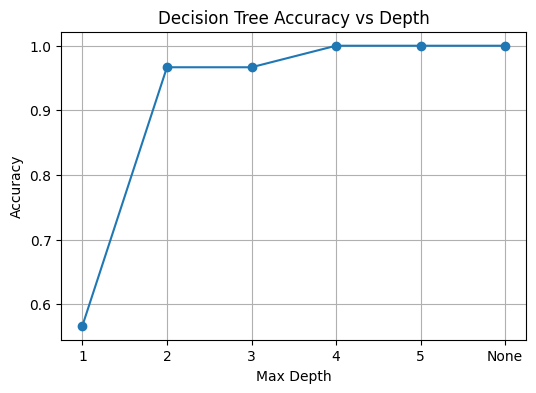

In [18]:
# %%
# Plot Accuracy vs Tree Depth
plt.figure(figsize=(6,4))
plt.plot([str(d) for d in depths], accuracy_list, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs Depth")
plt.grid(True)
plt.show()

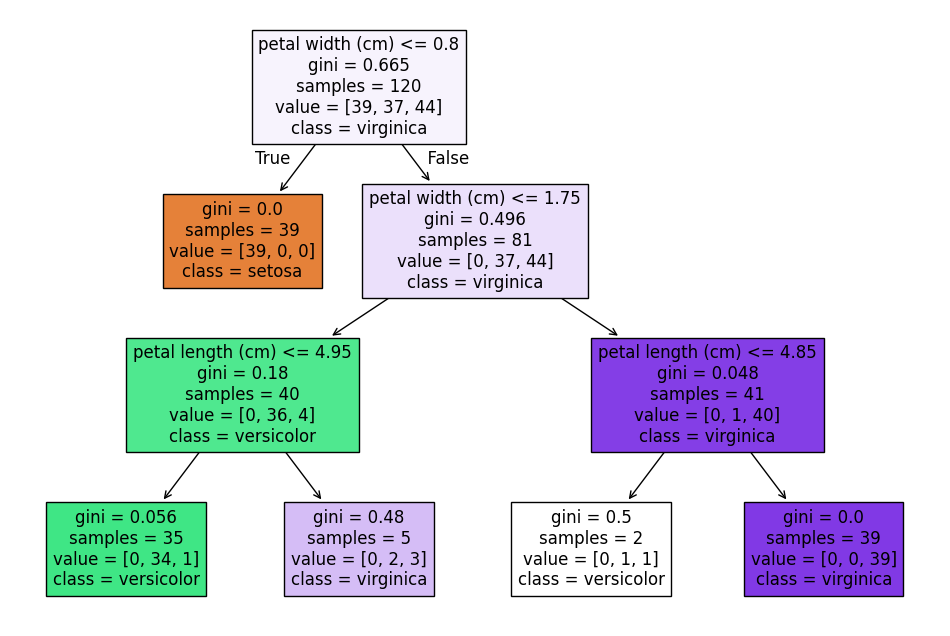

In [24]:
# Visualize a decision tree (depth=3 for clarity)
clf_viz = DecisionTreeClassifier(max_depth=3, random_state=0)
clf_viz.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(clf_viz, feature_names=iris.feature_names, 
          class_names=iris.target_names, filled=True)
plt.show()

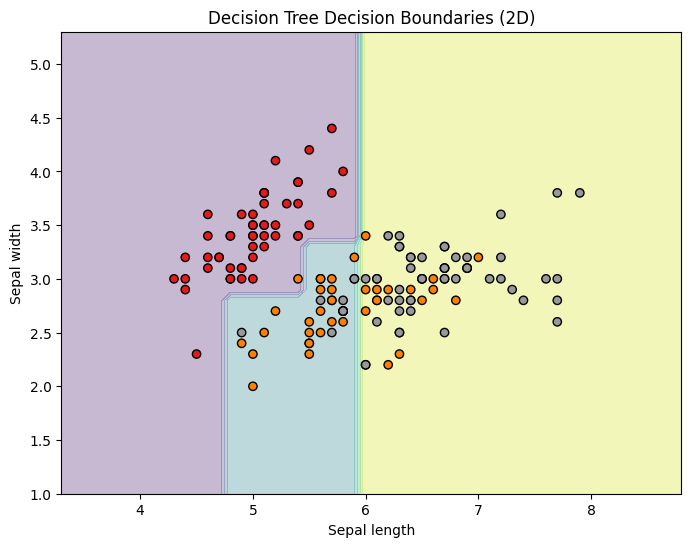

In [ ]:
# Plot decision boundaries using only 2 features (sepal length, sepal width)
X_2d = X[:, :2]  # take only first two features
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, 
                                                                test_size=0.2, 
                                                                random_state=0)

clf_2d = DecisionTreeClassifier(max_depth=3, random_state=0)
clf_2d.fit(X_train_2d, y_train_2d)

# Create a mesh to plot
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor="k", cmap=plt.cm.Set1)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Decision Tree Decision Boundaries (2D)")
plt.show()